# Pandas Test - Real life Exercise

In [15]:
import pandas as pd

For visualizations:

In [16]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

ModuleNotFoundError: No module named 'plotly_express'

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [17]:
ad_recs_annotated = pd.read_csv('data/Final assigment/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
162165,2021-week_44,AD008GUA86,Search Million Culture,GB,yes,NaN,Qality,DNNQ
321720,2022-week_04,AD08DD8FDY,Puentes Company,IN,yes,NaN,Yield,UserPopY
194987,2021-week_46,AD0968W878,MoJoe Brewing Company,IN,yes,NaN,Yield,RuleBasedY
76757,2021-week_38,AD08JS7SKQ,MoJoe Brewing Company,GB,no,True,Yield,RNNY
319765,2022-week_04,AD08TJ8LG8,iDreamsky Technology,GB,yes,NaN,Qality,DNNQ


In [227]:
most_pop_ad = ad_recs_annotated.ad_id.value_counts().idxmax()
most_pop_ad

'AD07PFFMP9'

In [19]:
q = f'ad_id == "{most_pop_ad}"'
q

'ad_id == "AD07PFFMP9    247\nAD098SWYF6    239\nAD08C8RR8J    138\nAD0886VY87     99\nAD08888888     96\n             ... \nAD07Y8JSHJ      1\nAD0888J7AO      1\nAD087G7SHR      1\nAD086QCZGJ      1\nAD08FWNFDO      1\nName: ad_id, Length: 300727, dtype: int64"'

In [5]:
#ad_recs_annotated.query('ad_id == @most_pop_ad')

Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column (Inplace)

In [97]:
#1
def retrieve_number(text, sign, retrieve_index):
    texts = text.split(sign)
    return texts[retrieve_index]

ad_recs_annotated["year"] = [retrieve_number(item, "-",0) for item in ad_recs_annotated["week_id"]]
ad_recs_annotated["year"]

0         2021
1         2021
2         2021
3         2021
4         2021
          ... 
373783    2022
373784    2022
373785    2022
373786    2022
373787    2022
Name: year, Length: 373788, dtype: object

In [98]:
#2
def quarter_from_week(week):
    return int(week) //13

ad_recs_annotated["quarter"] = ad_recs_annotated["week_id"].apply(func = retrieve_number, args = ("_", 1)).apply(func = quarter_from_week)

In [99]:
#3
ad_recs_annotated["is_sucess_int"] = [int(item == "yes") for item in ad_recs_annotated["is_success"]]

In [60]:
#4
print(ad_recs_annotated["is_sever"].isnull().value_counts())
ad_recs_annotated["is_sever_no_nan"] = ad_recs_annotated["is_sever"].fillna("False")
print(ad_recs_annotated["is_sever_no_nan"].value_counts())
print(ad_recs_annotated["is_sever_no_nan"].isnull().value_counts())

True     304195
False     69593
Name: is_sever, dtype: int64
False    304195
True      44689
False     24904
Name: is_sever_no_nan, dtype: int64
False    373788
Name: is_sever_no_nan, dtype: int64


##### 5 Capitlize (first letter only) the is_success column (Inplace)

In [68]:
ad_recs_annotated["is_success"].str.capitalize()

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
373783    Yes
373784    Yes
373785    Yes
373786    Yes
373787    Yes
Name: is_success, Length: 373788, dtype: object

### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DNNQ, RNNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

###### 1. How many requests are there in US region?

In [85]:
print(ad_recs_annotated[ad_recs_annotated["region"] == "US"].shape)
ad_recs_annotated.query('region == "US"').shape

(103846, 12)


(103846, 12)

###### 2. How many **successful** requests are there in US region? 

In [96]:
print(ad_recs_annotated[(ad_recs_annotated["region"] == "US") & (ad_recs_annotated["is_success"] == "Yes")].shape)
ad_recs_annotated.query('region == "US" and is_success == "Yes"').shape

(88918, 12)


(88918, 12)

###### 3. How many **successful** requests are there in US region on week 52? 

In [151]:
#add the week column
ad_recs_annotated["week"] = ad_recs_annotated["week_id"].apply(func = retrieve_number, args = ("_", 1)).apply(func = int)
print(ad_recs_annotated[(ad_recs_annotated["region"] == "US") & (ad_recs_annotated["is_success"] == "Yes") & (ad_recs_annotated["week"] == 52)].shape)
ad_recs_annotated.query('region == "US" and is_success == "Yes" and week==52').shape

(3342, 13)


(3342, 13)

###### 4. How many requests where delivered by DNNQ, RNNY and UserPopQ together?

In [132]:
print(ad_recs_annotated[ad_recs_annotated["rec_provider"].isin(["DNNQ", "DNNY", "UserPopQ"])].shape)
print(ad_recs_annotated.query("rec_provider in ('DNNQ', 'DNNY', 'UserPopQ')").shape)

(232477, 13)
(232477, 13)


###### 5.How many requests where delivered by rule based providers?

In [133]:
print(ad_recs_annotated.rec_provider.value_counts())

DNNQ                 117424
UserPopQ              69937
DNNY                  45116
UserPopY              38600
RuleBasedY            28154
RNNQ                  20983
ManualQ               13844
RNNY                  12732
XGBQ                  12250
XGBY                   4276
BooksY                 4150
UserPopSelectionQ      2417
ManualY                1982
BooksQ                 1720
RuleBased               182
UserPopSelectionY        21
Name: rec_provider, dtype: int64

###### 6.Select only the requests from 2021 - How many are there?

In [146]:
ad_recs_annotated[ad_recs_annotated["year"] == "2021"].shape
ad_recs_annotated.query("year == '2021'").shape

(271615, 13)

###### 7. Select the reqeusts from week 30 to week 40 - How many are there?

In [163]:
week_30_to_40 = ad_recs_annotated[(ad_recs_annotated["week"] >= 30) & (ad_recs_annotated["week"] <= 40)]
print(week_30_to_40.head())
print(week_30_to_40.shape)
week_30_to_40_ = ad_recs_annotated.query("week >=30 and week<=40")
print(week_30_to_40_.shape)

        week_id       ad_id               requester region is_success  \
0  2021-week_33   AD0088VOS  Search Million Culture     DE        Yes   
1  2021-week_33  AD07KYS8JM   MoJoe Brewing Company     DE        Yes   
2  2021-week_33  AD08PDP6Y9  Search Million Culture     DE        Yes   
3  2021-week_33  AD89608808  Search Million Culture     DE        Yes   
4  2021-week_33  AD07CMVHP6  Search Million Culture     DE        Yes   

  is_sever recommendation_type rec_provider  year  quarter  is_sucess_int  \
0      NaN              Qality         DNNQ  2021        2              0   
1      NaN               Yield         DNNY  2021        2              0   
2      NaN              Qality         DNNQ  2021        2              0   
3      NaN              Qality       BooksQ  2021        2              0   
4      NaN              Qality         DNNQ  2021        2              0   

  is_sever_no_nan  week  
0           False    33  
1           False    33  
2           False   

###### 8. Select all the data that comes from the most popular Ad

In [229]:
ad_recs_annotated[ad_recs_annotated["ad_id"] == most_pop_ad]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_sucess_int,is_sever_no_nan,week
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,2,0,False,33
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,2,0,False,33
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,2,0,False,34
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,2,0,False,34
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,2,0,False,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,4,0,False,52
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,4,0,False,52
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2022,4,0,False,52
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,4,0,False,52


###### 9. Select all the data that comes from the least popular provider

In [230]:
most_popular_provider = ad_recs_annotated.rec_provider.value_counts().idxmax()
ad_recs_annotated[ad_recs_annotated["rec_provider"] == most_popular_provider]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_sucess_int,is_sever_no_nan,week
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,2,0,False,33
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,2,0,False,33
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,2,0,False,33
5,2021-week_33,AD008DJKGW,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,2,0,False,33
7,2021-week_33,AD07NMJ88F,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,2,0,False,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373746,2022-week_52,AD0088HWWX,Fancy,US,Yes,NaN,Qality,DNNQ,2022,4,0,False,52
373774,2022-week_52,AD07NQW86M,Fancy,US,Yes,NaN,Qality,DNNQ,2022,4,0,False,52
373777,2022-week_52,AD00AXTO80,Fancy,US,Yes,NaN,Qality,DNNQ,2022,4,0,False,52
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,Yes,NaN,Qality,DNNQ,2022,4,0,False,52


###### 10. Select the data in which is_sever is None. How big is it?

In [232]:
is_na_sever = ad_recs_annotated[ad_recs_annotated.is_sever.isna()]
is_na_sever.shape

(304195, 13)

###### 11. Select the data in which the requester is a 3 word company

In [343]:
splitted_requester = [len(r) >= 3 for r in [req.split() for req in  ad_recs_annotated.requester.value_counts().index.tolist()]]

requester_to_words_count = pd.Series(splitted_requester, index = ad_recs_annotated.requester.value_counts().index)
requester_to_words_count.index.name = "requester"
requester_names = requester_to_words_count[requester_to_words_count == True].index.tolist()
print(requester_names)

ad_recs_annotated[ad_recs_annotated["requester"].isin(requester_names)]

['Search Million Culture', 'MoJoe Brewing Company', 'Doctorfun Entertainment, Ltd', 'Mission Street Manufacturing', 'PureSafe water systems']
<class 'list'>


,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_sucess_int,is_sever_no_nan,week
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,2,0,False,33
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,2,0,False,33
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,2,0,False,33
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,2,0,False,33
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,2,0,False,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373663,2022-week_52,AD09G98VJZ,MoJoe Brewing Company,US,Yes,NaN,Yield,RNNY,2022,4,0,False,52
373689,2022-week_52,AD078WDG8W,MoJoe Brewing Company,US,Yes,NaN,Yield,RNNY,2022,4,0,False,52
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,4,0,False,52
373722,2022-week_52,AD09C8X6VY,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2022,4,0,False,52


###### 12. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it

In [351]:
def is_letter_in_text(txt, letter):
    return txt.find(letter) > 0

#print(ad_recs_annotated[ad_recs_annotated.ad_id.apply(func = is_letter_in_text, args = ("6"))].shape)
ad_recs_annotated[(ad_recs_annotated["requester"].isin(requester_names)) & (ad_recs_annotated.ad_id.apply(func = is_letter_in_text, args = ("6")))]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_sucess_int,is_sever_no_nan,week
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,2,0,False,33
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,2,0,False,33
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,2,0,False,33
11,2021-week_33,AD88967068,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,2,0,False,33
41,2021-week_33,AD07L6JC8W,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,2,0,False,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373364,2022-week_52,AD06XJR86M,MoJoe Brewing Company,US,Yes,NaN,Yield,RuleBasedY,2022,4,0,False,52
373394,2022-week_52,AD08Y6R9WV,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,4,0,False,52
373511,2022-week_52,AD09C68T8Y,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,4,0,False,52
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,4,0,False,52


###### 13. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


###### 1. How many weeks available in the data? Are there any missing weeks? 

In [405]:
def missing_numbers(num_list):
    missing = []
    for i in range(1,max(num_list)):
        if num_list.count(i) == 0:
            missing.append(i)
    return missing
            
    
unique_weeks = ad_recs_annotated.week.unique().tolist()
print(unique_weeks)
sorted_weeks = sorted(unique_weeks)
print(sorted_weeks)
print(missing_numbers(sorted_weeks))

[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 1, 2, 3, 4, 5, 6, 52]
[1, 2, 3, 4, 5, 6, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


###### 2. How many regions available in the data? Are there any missing weeks per region?

In [430]:
unique_regions = ad_recs_annotated.region.unique().tolist()
print(unique_regions)
missing_weeks_per_region = [missing_numbers(row.tolist()) for row in ad_recs_annotated.groupby("region").week.unique()]
print(missing_weeks_per_region)
##

['DE', 'GB', 'IN', 'JP', 'US']
[[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 51], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]]


###### 3. How many ads are being sent to annotation in each region per week?

In [457]:
ad_recs_annotated.recommendation_type.value_counts()
ad_recs_annotated.groupby(['region','week']).ad_id.count()

region  week
DE      1       2402
        2       2394
        3       2378
        4       2365
        5       2382
                ... 
US      48      4010
        49      3994
        50      3991
        51      3996
        52      3998
Name: ad_id, Length: 129, dtype: int64

###### 4. How many None values are there in is_sever column? 

In [450]:
print(ad_recs_annotated["is_sever"].isnull().value_counts())

True     304195
False     69593
Name: is_sever, dtype: int64


###### 5. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)

In [483]:
ads_per_week = ad_recs_annotated.groupby(['week','ad_id'])['ad_id'].count().rename('num_ads').to_frame()
max_number = max(ads_per_week['num_ads'])
ads_per_week[ads_per_week['num_ads'] == max_number]

,,num_ads
week,ad_id,
40,AD098SWYF6,81


###### 7. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place?

In [497]:
print(ad_recs_annotated[ad_recs_annotated["is_sever"].isnull()].query("is_sucess_int == 0").shape)
ad_recs_annotated[ad_recs_annotated["is_sever"].isnull()].query("is_sucess_int == 1").shape

(304195, 13)


(0, 13)

###### 8. Per each region, What is the Quality/Yield traffic proportion WoW? 

In [514]:
grouped_by_region = ad_recs_annotated.groupby(['region', 'recommendation_type'])['week'].sum()
grouped_by_region.unstack().Qality / grouped_by_region.unstack().Yield

region
DE    4.017434
GB    4.886347
IN    0.918375
JP    5.472529
US    0.663694
dtype: float64

###### 9. How many different reqeusters are there? 

In [522]:
ad_recs_annotated.requester.nunique()

36

###### 10. Which are the top 5 requesters per region?

In [576]:
ad_recs_annotated.groupby(['region','requester'])["region"].count().to_frame().nlargest(5,["region"])

,,region
region,requester,
US,Extreme DA,57215
IN,Puentes Company,29427
GB,Search Million Culture,28002
JP,RelayFoods,24574
DE,Search Million Culture,23657


###### 11. Which are the different rec_proivders?

In [587]:
ad_recs_annotated.groupby('region').rec_provider.unique().reset_index()

,region,rec_provider
0,DE,"[DNNQ, DNNY, BooksQ, UserPopQ, UserPopY, RuleB..."
1,GB,"[DNNY, XGBQ, DNNQ, XGBY, RNNQ, UserPopQ, Manua..."
2,IN,"[UserPopY, RuleBasedY, UserPopQ, ManualY, Manu..."
3,JP,"[ManualQ, UserPopQ, RuleBasedY, DNNQ, ManualY,..."
4,US,"[DNNY, ManualQ, DNNQ, UserPopY, XGBY, RNNY, Ma..."


###### 12. Are there different rec providers per region?

In [622]:
def are_list_equal(list1, list2):
    return sorted(list1) == list2
by_providers = ad_recs_annotated.groupby('region')['rec_provider'].unique().to_frame()

providers = sorted(by_providers['rec_provider'][0])


are_providers_different = [are_list_equal(lst, providers) for lst in by_providers['rec_provider']]
print(are_providers_different)

#double check the result
for i in range(by_providers.shape[0]):
    providers = by_providers['rec_provider'][i]
    providers = sorted(providers)
    print(providers)


[True, False, False, False, False]
['BooksQ', 'BooksY', 'DNNQ', 'DNNY', 'ManualQ', 'ManualY', 'RuleBasedY', 'UserPopQ', 'UserPopY']
['DNNQ', 'DNNY', 'ManualQ', 'ManualY', 'RNNQ', 'RNNY', 'RuleBased', 'RuleBasedY', 'UserPopQ', 'UserPopY', 'XGBQ', 'XGBY']
['ManualQ', 'ManualY', 'RuleBased', 'RuleBasedY', 'UserPopQ', 'UserPopY']
['DNNQ', 'DNNY', 'ManualQ', 'ManualY', 'RuleBasedY', 'UserPopQ', 'UserPopSelectionQ', 'UserPopSelectionY', 'UserPopY']
['BooksQ', 'BooksY', 'DNNQ', 'DNNY', 'ManualQ', 'ManualY', 'RNNQ', 'RNNY', 'RuleBased', 'RuleBasedY', 'UserPopQ', 'UserPopY', 'XGBQ', 'XGBY']


Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

### Compactization

* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [4]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

['2021_33_DE_Qality_annotation_result.csv',
 '2021_33_DE_Yield_annotation_result.csv',
 '2021_33_DE__Sample.csv',
 '2021_33_GB_Qality_annotation_result.csv',
 '2021_33_GB_Yield_annotation_result.csv',
 '2021_33_GB__Sample.csv',
 '2021_33_IN_Qality_annotation_result.csv',
 '2021_33_IN_Yield_annotation_result.csv',
 '2021_33_IN__Sample.csv',
 '2021_33_JP_Qality_annotation_result.csv']

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

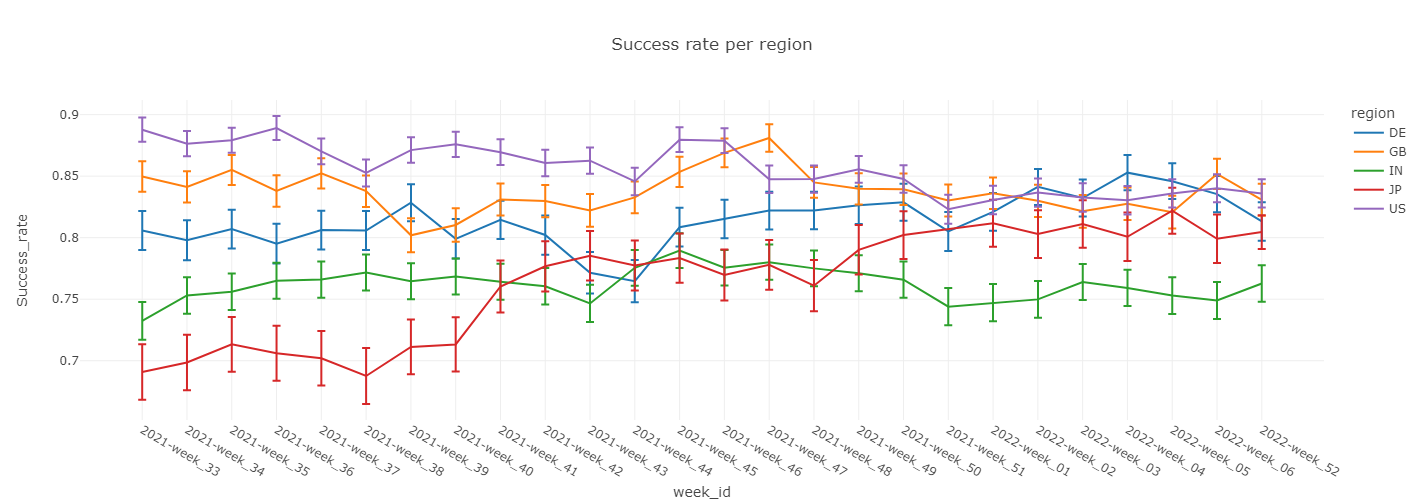

Produce the following requestser proportion graph:

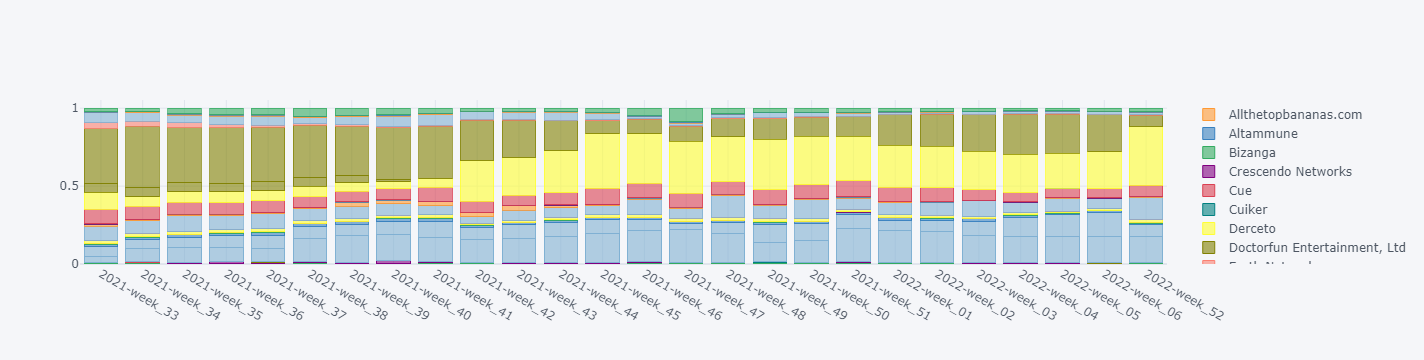

## Appendix

Code to create weekly files:

In [67]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)